# NORS Dataset Exploratory Data Analysis
- This notebook explores temporal patterns, outbreak severity indicators, transmission modes, and descriptive statistics using the cleaned dataset.

## 1. Import Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import calendar

## 2. Load Cleaned Dataset

In [2]:
# Loading Cleaned Dataset
df = pd.read_csv("../Data/NORS_cleaned.csv")

## 3. Overview of Key Outcome Measures

,Illnesses,Hospitalizations,Deaths
count,66659.000000,58155.000000,58785.000000
mean,25.002175,0.825501,0.042375
std,42.227138,4.164555,0.436484
min,2.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000
75%,30.000000,1.000000,0.000000
max,990.000000,308.000000,50.000000


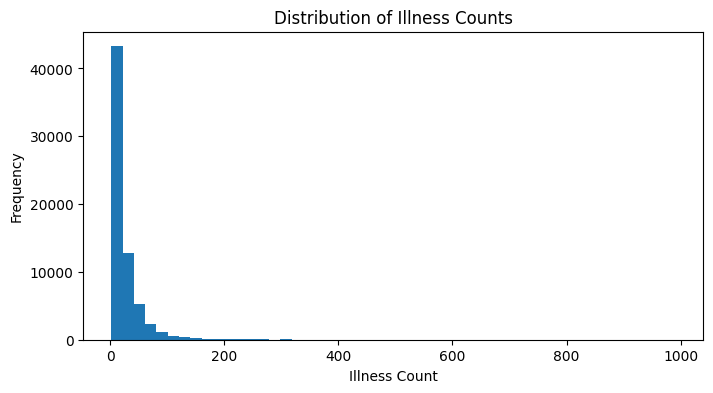

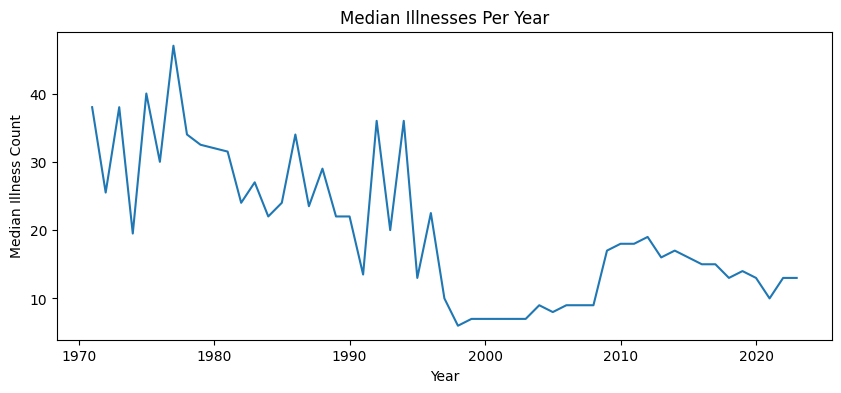

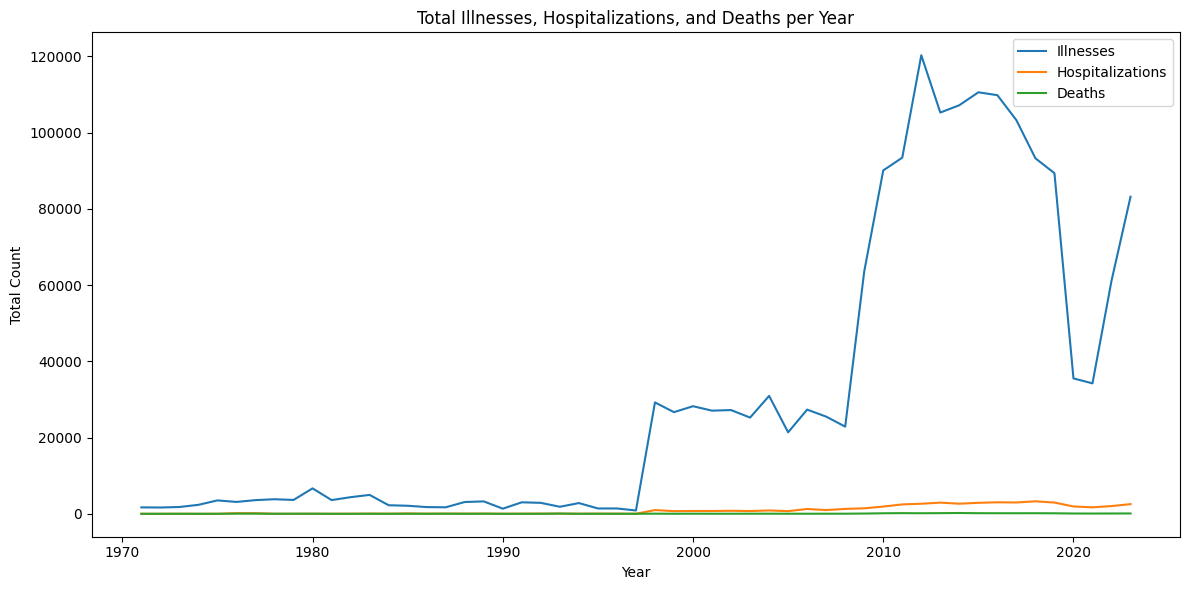

Illnesses in 2000: 28,232.0
Illnesses in 2012: 120,323.0
Percent increase (2000 to 2012): 326.2%


In [ ]:
# Data Exploration
# Summary stats for key health outcome variables
display(df[['Illnesses', 'Hospitalizations', 'Deaths']].describe())

# Median illnesses per year (better for skewed distributions)
median_by_year = df.groupby('Year')['Illnesses'].median()

# Histogram of Illnesses — shows skew (most outbreaks are small, few are very large)
plt.figure(figsize=(8,4))
df["Illnesses"].hist(bins=50)
plt.title("Distribution of Illness Counts")
plt.xlabel("Illness Count")
plt.ylabel("Frequency")
plt.grid(False)  
plt.show()

# Plot median illnesses over time
median_by_year.plot(figsize=(10,4), title="Median Illnesses Per Year")

plt.xlabel("Year")
plt.ylabel("Median Illness Count")
plt.grid(False)  
plt.show()

# Total Annual Illnesses, Hospitalizations, and Deaths
annual_totals = df.groupby('Year')[['Illnesses','Hospitalizations','Deaths']].sum()

plt.figure(figsize=(12,6))
plt.plot(annual_totals.index, annual_totals['Illnesses'], label='Illnesses')
plt.plot(annual_totals.index, annual_totals['Hospitalizations'], label='Hospitalizations')
plt.plot(annual_totals.index, annual_totals['Deaths'], label='Deaths')

plt.title("Total Illnesses, Hospitalizations, and Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.grid(False)  
plt.legend()
plt.tight_layout()
plt.show()

# Percent increase 2000 to 2012
ill_2000 = annual_totals.loc[2000, 'Illnesses']
ill_2012 = annual_totals.loc[2012, 'Illnesses']
pct_increase = ((ill_2012 - ill_2000) / ill_2000) * 100

print(f"Illnesses in 2000: {ill_2000:,}")
print(f"Illnesses in 2012: {ill_2012:,}")
print(f"Percent increase (2000 to 2012): {pct_increase:.1f}%")

## 4. Create Study Subset

In [3]:
# Subset creation
df_subset = df[df["Year"] >= 2000].copy()

## 5. Subset Overview

In [4]:
# Dataset info
num_rows = df_subset.shape[0]
num_columns = df_subset.shape[1]
years_covered = "2000–2024"

# Total outbreaks
total_outbreaks = num_rows

# Outbreaks by primary mode (Foodborne, Waterborne, etc.)
outbreaks_by_mode = df_subset['Primary Mode'].value_counts()

# Total reported illnesses
total_illnesses = df_subset['Illnesses'].sum()

# Average illnesses per outbreak
avg_illnesses = df_subset['Illnesses'].mean()

# Outbreaks with deaths
outbreaks_with_deaths = df_subset[df_subset['Deaths'] > 0].shape[0]

# Peak outbreak year (most outbreaks)
peak_outbreak_year = df_subset['Year'].value_counts().idxmax()
peak_outbreak_count = df_subset['Year'].value_counts().max()

# Peak illness year (most total illnesses)
illnesses_by_year = df_subset.groupby('Year')['Illnesses'].sum()
peak_illness_year = illnesses_by_year.idxmax()
peak_illness_count = illnesses_by_year.max()

# Display results
print(f"Rows: {num_rows}")
print(f"Columns: {num_columns}")
print(f"Years covered: {years_covered}")
print(f"Total outbreaks: {total_outbreaks}")
print("Outbreaks by Primary Mode:")
print(outbreaks_by_mode)
print(f"Total reported illnesses: {total_illnesses}")
print(f"Average illnesses per outbreak: {avg_illnesses:.1f}")
print(f"Outbreaks with deaths: {outbreaks_with_deaths}")
print(f"Peak outbreak year: {peak_outbreak_year} ({peak_outbreak_count} outbreaks)")
print(f"Peak illness year: {peak_illness_year} ({int(peak_illness_count)} illnesses)")


Rows: 62964
Columns: 18
Years covered: 2000–2024
Total outbreaks: 62964
Outbreaks by Primary Mode:
Primary Mode
Person-to-person                                     32414
Food                                                 22076
Indeterminate/unknown                                 5677
Water                                                 2010
Animal contact                                         655
Environmental contamination other than food/water      132
Name: count, dtype: int64
Total reported illnesses: 1536265.0
Average illnesses per outbreak: 24.4
Outbreaks with deaths: 1513
Peak outbreak year: 2016 (4331 outbreaks)
Peak illness year: 2012 (120323 illnesses)


## 6. Visualizations

In [5]:
# Defining a number formatter function to handle large numbers 
def format_kmb(x, pos=None):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return str(int(x))

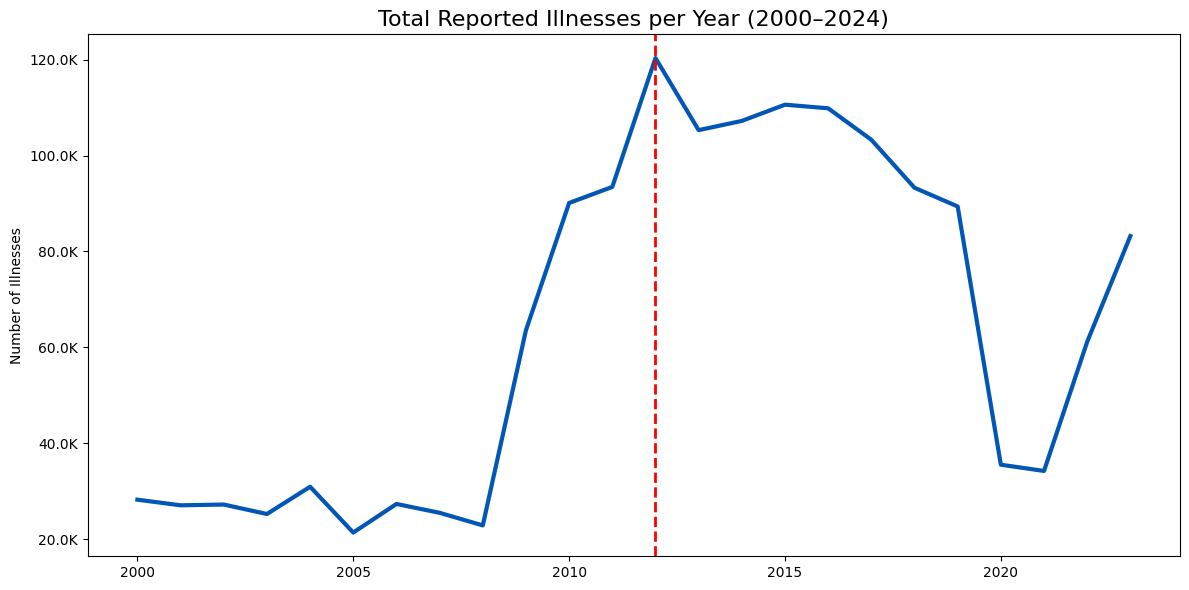

In [6]:
# 1. Annual Illness Trends (2000–2024)
## Question: What were the annual illness trends from 2000–2024?

# Group data by year and sum total illnesses
annual = df_subset.groupby("Year")["Illnesses"].sum()

# Plot annual illness totals
plt.figure(figsize=(12,6))
plt.plot(annual.index, annual.values, color='#0256b5', linewidth=3)
plt.axvline(2012, color='red', linestyle='--', linewidth=2)
plt.title("Total Reported Illnesses per Year (2000–2024)", fontsize=16)
plt.ylabel("Number of Illnesses")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.grid(False) 

# Save figure
plt.savefig("../Figures/annual_illness_trends.png", dpi=300, bbox_inches='tight')

From 2000 to 2008, reported illnesses in the United States remained relatively steady, fluctuating between approximately 20,000 and 30,000 cases per year. Beginning around 2009, illnesses rose sharply, culminating in a 2012 peak of 120,323 cases—a 326% increase from the year 2000. Following this peak, illnesses gradually declined before rising again approaching 2024.

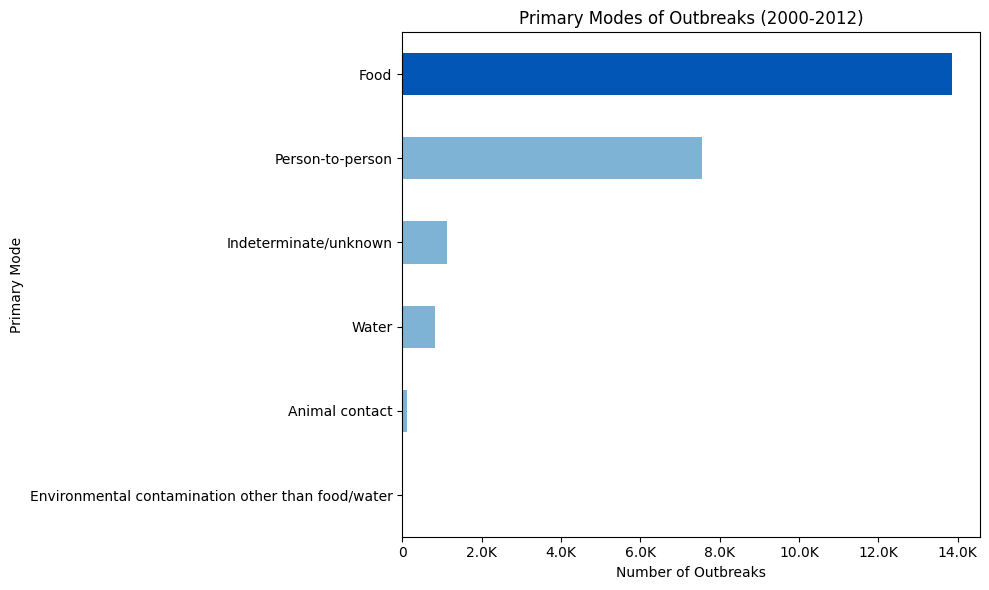

In [7]:
# 2. Transmission Mode Shifts (2000–2012)
## Question: Which primary transmission modes were most common across all reported outbreaks from 2000–2024?

# Subset data for 2000–2012
subset_2012 = df_subset[df_subset["Year"].between(2000, 2012)]

# Compute mode counts for 2000–2012
mode_counts = subset_2012['Primary Mode'].value_counts()

# Plot
plt.figure(figsize=(10,6))
colors = ['#0256b5' if i == 0 else '#7fb3d5' for i in range(len(mode_counts))] # Highlight top mode
ax = mode_counts.plot(kind='barh', color=colors)
plt.xlabel('Number of Outbreaks')
plt.ylabel('Primary Mode')
plt.title('Primary Modes of Outbreaks (2000-2012)')
plt.gca().invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.tight_layout()
plt.grid(False) 

# Save figure
plt.savefig("../Figures/transmission_mode_shifts.png", dpi=300)

From 2000–2012, foodborne transmission consistently accounted for the largest share of reported outbreaks in the United States, with person-to-person transmission representing the second most common mode.

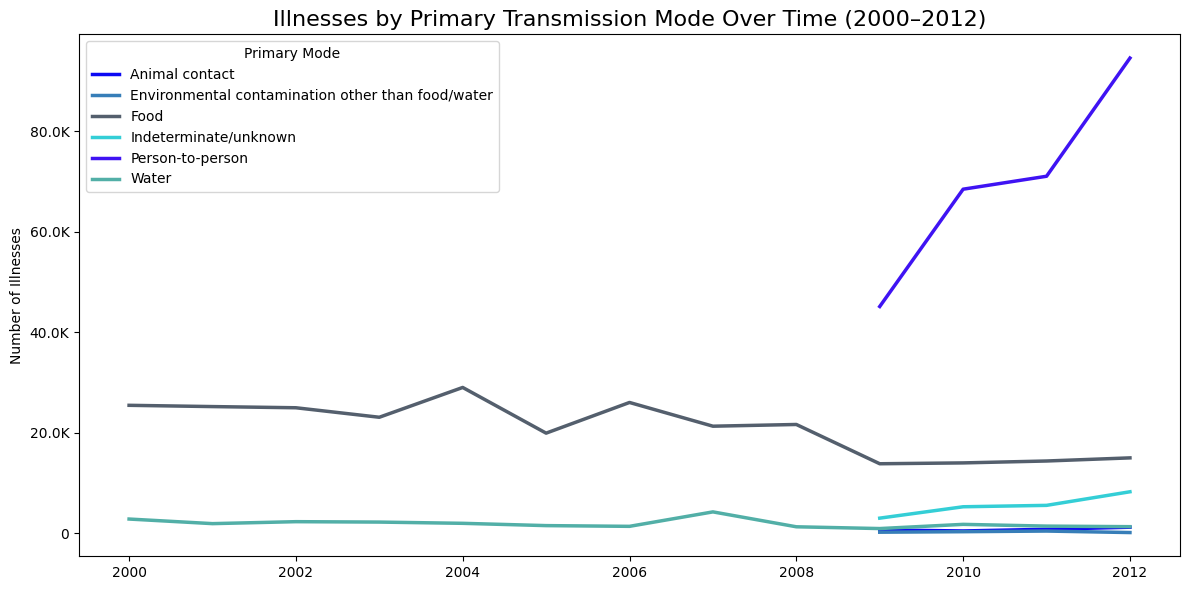

In [12]:
# 2.5 Transmission Mode Shifts (2000–2012)
## Question: How did illness counts differ across primary transmission modes?

# Compute mode counts for the period
mode_year = subset_2012.groupby(["Year", "Primary Mode"])["Illnesses"].sum().unstack()

# Plot
plt.figure(figsize=(12, 6))

palette = ["#0C09F3", "#377EB8", "#545f6d", "#34CED6", "#3F13F3", "#52AFA7"]

for i, mode in enumerate(mode_year.columns):
    plt.plot(
        mode_year.index,
        mode_year[mode],
        label=mode,
        color=palette[i % len(palette)],
        linewidth=2.5
    )

plt.title("Illnesses by Primary Transmission Mode Over Time (2000–2012)", fontsize=16)
plt.ylabel("Number of Illnesses")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.legend(title="Primary Mode")
plt.grid(False)
plt.tight_layout()

# Save figure
plt.savefig("../Figures/illnesses_by_transmission_mode.png", dpi=300)

From 2000–2008, person-to-person transmission was not a major reported mode of illness, but it emerged sharply in 2009. After appearing, it increased steadily through 2010 and 2011, reaching its highest level in 2012. This rapid rise suggests the emergence or improved detection of illnesses spread directly between people during this period. Compared with other transmission modes—which remained relatively stable or changed only modestly—the surge in person-to-person cases became a key contributor to the overall increase in illnesses by 2012, underscoring the need for strengthened public-health measures focused on direct human transmission.

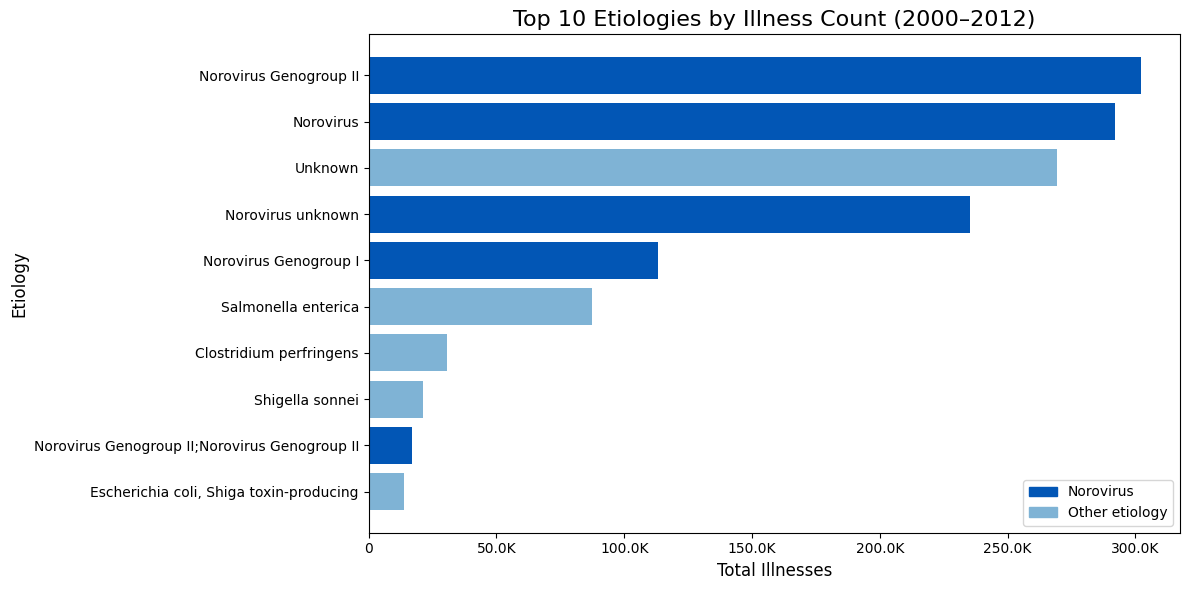

In [13]:
# 3. Illnesses by Etiology (2000-2012)
## Question: what etiologies were the most frequent between 2000-2012?

# Sum illnesses by etiology (2000–2012)
etiology_0012 = (
    df_subset.groupby("Etiology")["Illnesses"]
    .sum()
    .sort_values(ascending=False)
)

# Top 10 etiologies
top_etiology_0012 = etiology_0012.head(10)

# Plot
colors = [
    "#0256b5" if "noro" in et.lower() else "#7fb3d5"
    for et in top_etiology_0012.index
]

plt.figure(figsize=(12,6))
plt.barh(top_etiology_0012.index, top_etiology_0012.values, color=colors)

plt.title("Top 10 Etiologies by Illness Count (2000–2012)", fontsize=16)
plt.xlabel("Total Illnesses", fontsize=12)
plt.ylabel("Etiology", fontsize=12)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.gca().invert_yaxis()  # largest at top

# Key 
norovirus_patch = mpatches.Patch(color="#0256b5", label="Norovirus")
other_patch     = mpatches.Patch(color="#7fb3d5", label="Other etiology")
plt.legend(handles=[norovirus_patch, other_patch], loc="lower right")

plt.tight_layout()
plt.grid(False)

# Save figure
plt.savefig("../Figures/illnesses_by_etiology.png", dpi=300)

From 2000 to 2012, illnesses were overwhelmingly driven by viral etiologies—particularly norovirus and its associated genogroups. Norovirus Genogroup II and unspecified norovirus categories consistently accounted for the highest illness counts, far surpassing most bacterial causes such as Salmonella enterica or Clostridium perfringens.

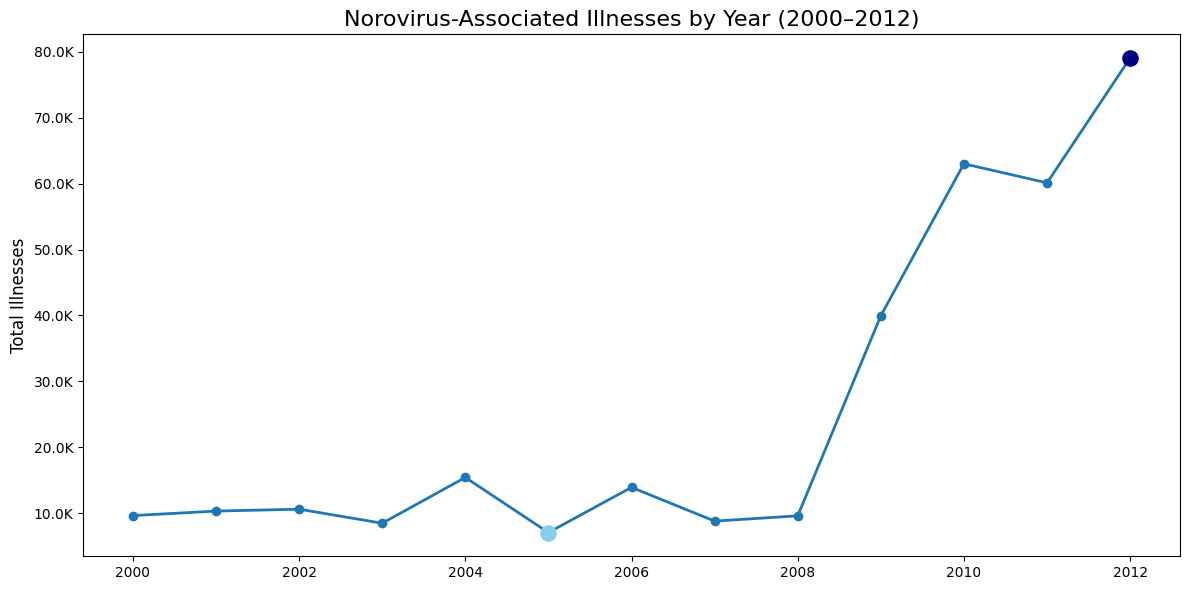

In [22]:
# 3.5 Illnesses by Etiology (2000-2012)
## Question: How did norovirus illness counts change from 2000–2012

# Filter for years 2000–2012
df_0012 = df_subset[(df_subset["Year"] >= 2000) & (df_subset["Year"] <= 2012)].copy()

# Standardize etiology text
df_0012["Etiology_clean"] = df_0012["Etiology"].str.lower()

# Filter for Norovirus outbreaks only
noro_df = df_0012[df_0012["Etiology_clean"].str.contains("noro")]

# Sum illnesses by year
noro_by_year = (
    noro_df.groupby("Year")["Illnesses"]
    .sum()
    .reindex(range(2000, 2013), fill_value=0)
)

# Identify max and min years
max_year = noro_by_year.idxmax()
max_val = noro_by_year.max()

min_year = noro_by_year.idxmin()
min_val = noro_by_year.min()

# Plot
plt.figure(figsize=(12,6))
plt.plot(noro_by_year.index, noro_by_year.values, marker="o", linewidth=2)
plt.scatter(max_year, max_val, s=120, color="navy", zorder=3) # Highlight max point
plt.scatter(min_year, min_val, s=120, color="skyblue", zorder=3) # Highlight min point
plt.title("Norovirus-Associated Illnesses by Year (2000–2012)", fontsize=16)
plt.ylabel("Total Illnesses", fontsize=12)
plt.grid(False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.tight_layout()

# Save
plt.savefig("../Figures/norovirus_illness_trends.png", dpi=300)


From 2000 through roughly 2008, norovirus-associated illnesses remained stable and relatively low, showing only minor year-to-year variation. Beginning in 2009, however, illnesses increased sharply and continued rising through 2012, reaching the highest total in the entire study period. The rapid escalation from 2009–2012 contrasts strongly with the preceding decade, indicating that the 2012 peak was not a random anomaly but part of a sustained multi-year surge.

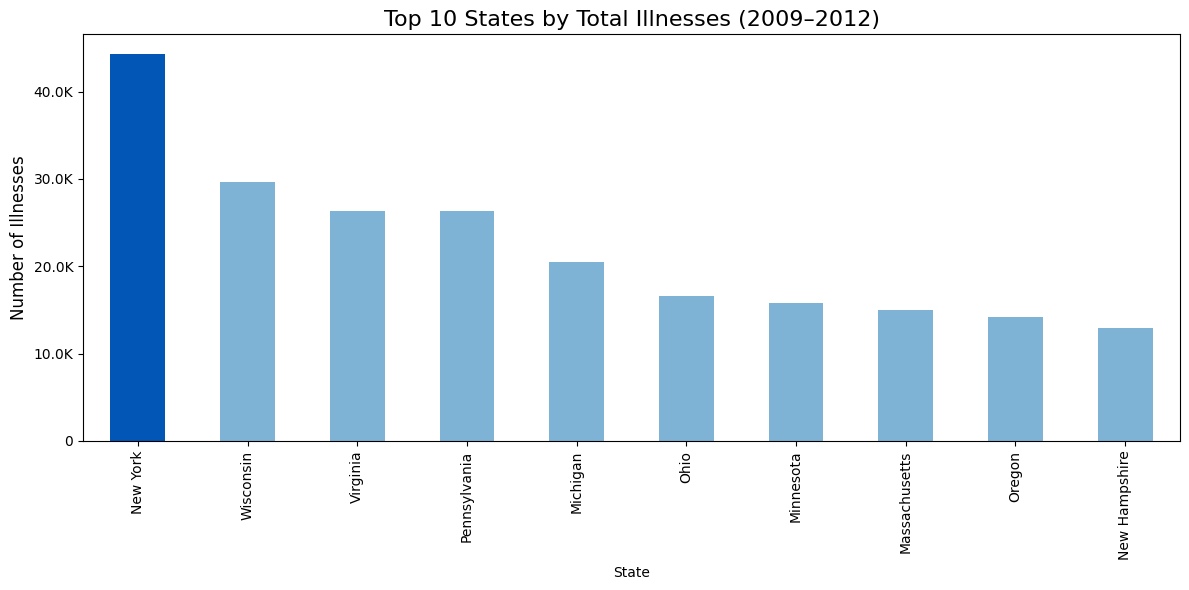

In [15]:
# 4 State-Level Growth During 2009–2012 
## Question: Which states had the highest total illnesses from 2009–2012?

# Filter data for 2009–2012
subset_peak = df_subset[df_subset["Year"].between(2009, 2012)]

# Sum illnesses by state 
state_totals_peak = (
    subset_peak.groupby("State")["Illnesses"]
    .sum()
    .sort_values(ascending=False)
)

# Highlight top state 
colors = ['#0256b5' if val == state_totals_peak.max() else '#7fb3d5' for val in state_totals_peak.head(10)]

# Plot
plt.figure(figsize=(12,6))
ax = state_totals_peak.head(10).plot(kind="bar", color=colors)

plt.title("Top 10 States by Total Illnesses (2009–2012)", fontsize=16)
plt.ylabel("Number of Illnesses", fontsize=12)

# Apply number formatting to y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_kmb))

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.grid(False) 

# Save figure
plt.savefig("../Figures/state_level_totals_2009_2012.png", dpi=300)

From 2009–2012, New York reported the highest total number of illnesses, far exceeding all other states. Wisconsin, Virginia, and Pennsylvania followed, each with substantial but lower totals. Midwestern and Northeastern states—including Michigan, Ohio, Minnesota, Massachusetts, and New Hampshire—also ranked among the top contributors during this period. These patterns suggest that the burden of illness between 2009 and 2012 was concentrated in a small group of states, with New York playing a particularly significant role.

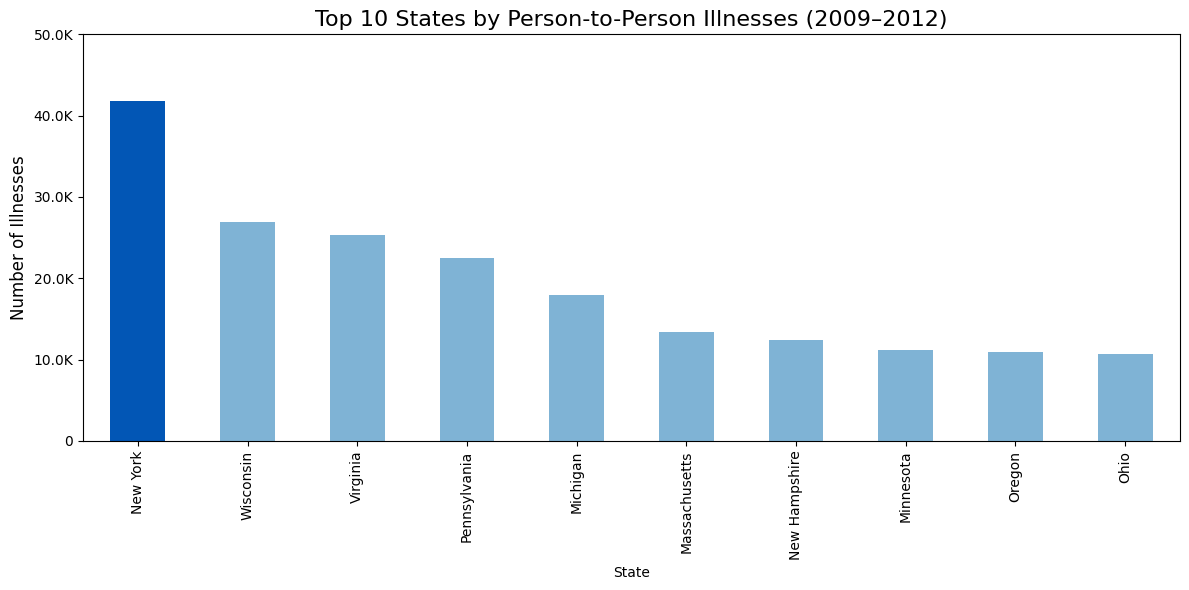

In [16]:
# 4.5 State-Level Growth During 2009–2012 
## Question: Which states had the highest person-to-person illnesses from 2009–2012?

# Filter data for 2009–2012 AND Person-to-person transmission
subset_p2p = df_subset[
    df_subset["Year"].between(2009, 2012) &
    (df_subset["Primary Mode"] == "Person-to-person")
]

# Sum illnesses by state
state_p2p_totals = (
    subset_p2p.groupby("State")["Illnesses"]
    .sum()
    .sort_values(ascending=False)
)

# Top 10 states
top10_p2p = state_p2p_totals.head(10)

# Plot
colors = ['#7fb3d5' if val != top10_p2p.max() else '#0256b5' for val in top10_p2p]
plt.figure(figsize=(12,6))
ax = top10_p2p.plot(kind="bar", color=colors)
plt.title("Top 10 States by Person-to-Person Illnesses (2009–2012)", fontsize=16)
plt.ylabel("Number of Illnesses", fontsize=12)

# Set y-axis ticks at 10,000 increments
max_y = int(top10_p2p.max())
plt.yticks(range(0, max_y + 10000, 10000))

ax.yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.grid(False) 

# Save figure
plt.savefig("../Figures/state_level_person_to_person_2009_2012.png", dpi= 300)

Person-to-person illnesses from 2009–2012 were concentrated in a similar group of states. New York reported the highest levels, followed by Wisconsin and Virginia. Pennsylvania and Michigan contributed additional substantial case counts, while Massachusetts, New Hampshire, Minnesota, Oregon, and Ohio showed moderate but notable levels. Together, these states accounted for the majority of person-to-person transmission during this period.

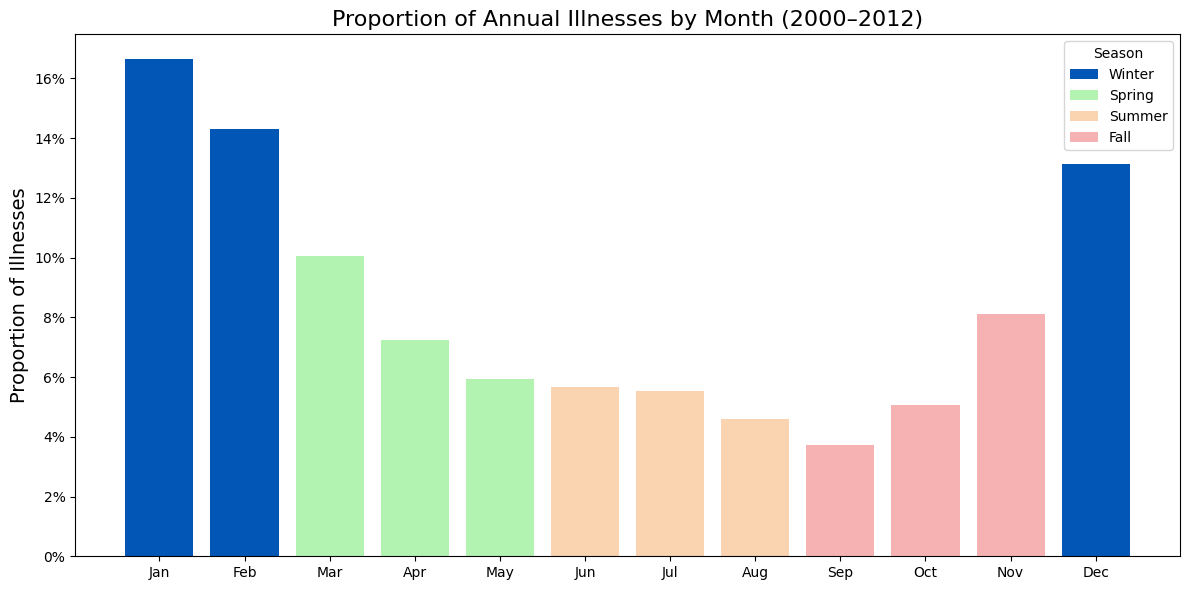

In [17]:
# 5 Seasonal Pattern Shift (2000–2012)
## Question: How did seasonal patterns in illnesses vary throughout the year from 2000–2012

# Calculate monthly illnesses and proportions
monthly = subset_2012.groupby("Month")["Illnesses"].sum()
monthly_prop = monthly / monthly.sum()

# Map months to names
month_names = [calendar.month_abbr[m] for m in monthly_prop.index]

# Define seasons by month
season_labels = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
monthly_seasons = [season_labels[m] for m in monthly_prop.index]

# Assign colors to seasons
season_colors = {'Winter':"#0256b5", 'Spring':"#b2f3b2", 'Summer':"#fad3b0", 'Fall':"#f6b2b2"}
bar_colors = [season_colors[season] for season in monthly_seasons]

# Plot
plt.figure(figsize=(12,6))
plt.bar(month_names, monthly_prop.values, color=bar_colors)
plt.title("Proportion of Annual Illnesses by Month (2000–2012)", fontsize=16)
plt.ylabel("Proportion of Illnesses", fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0%}"))

# Add legend for seasons
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=season) for season, color in season_colors.items()]
plt.legend(handles=legend_elements, title="Season")

plt.tight_layout()
plt.grid(False)

# Save figure
plt.savefig("../Figures/seasonal_pattern_shift.png", dpi=300)

Looking at seasonal patterns from 2000–2012, illnesses showed a clear winter peak. January accounted for the highest proportion of cases at around 17%, followed by February at roughly 14% and December at about 13%. In contrast, illnesses were at their lowest toward the end of summer and the start of fall, with August contributing only about 4.5% and September around 4%. 

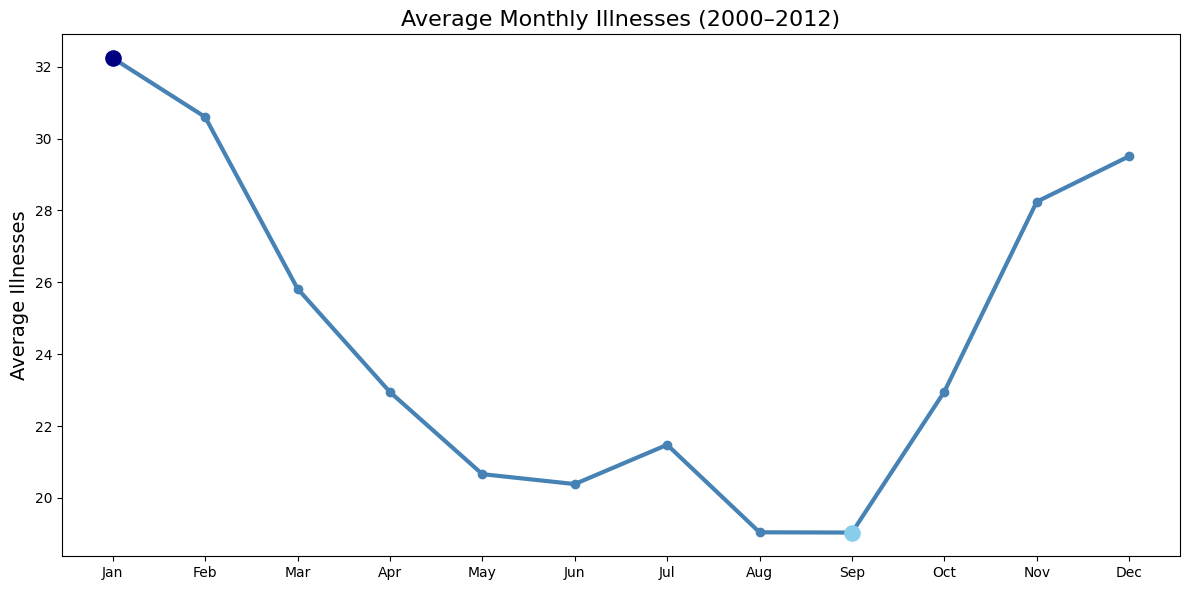

In [18]:
# 5.5 Seasonal Pattern Shift (2000–2012)
## Question: What were the average monthly illness counts from 2000–2012?

# Calculate average monthly illnesses
monthly_avg = subset_2012.groupby("Month")["Illnesses"].mean()

# Map months to names
month_names = [calendar.month_abbr[m] for m in monthly_avg.index]

# Identify max and min
max_idx = monthly_avg.idxmax()
min_idx = monthly_avg.idxmin()

max_x  = calendar.month_abbr[max_idx]
min_x  = calendar.month_abbr[min_idx]
max_y  = monthly_avg.loc[max_idx]
min_y  = monthly_avg.loc[min_idx]

# Plot
plt.figure(figsize=(12,6))
plt.plot(month_names, monthly_avg.values, marker="o", linewidth=3, color="steelblue")
plt.scatter(max_x, max_y, s=120, color="navy", zorder=3) # Highlight max 
plt.scatter(min_x, min_y, s=120, color="skyblue", zorder=3) # Highlight min 
plt.title("Average Monthly Illnesses (2000–2012)", fontsize=16)
plt.ylabel("Average Illnesses", fontsize=14)
plt.grid(False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.tight_layout()

# Save figure
plt.savefig("../Figures/average_monthly_illnesses_2000_2012.png", dpi=300)

Illnesses were highest in January (~32 cases) and February (~31 cases), declined steadily from March through June, reached a low in August–September (~19 cases), and rose again in October–December (~23–30 cases). This shows clear month-to-month fluctuations in outbreak activity throughout the year.

/var/folders/p3/cb9yqkz55rzbcyqz_jw56g3r0000gn/T/ipykernel_45050/4145427768.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_setting_top['Other'] = year_setting.drop(columns=top_settings_list).sum(axis=1)


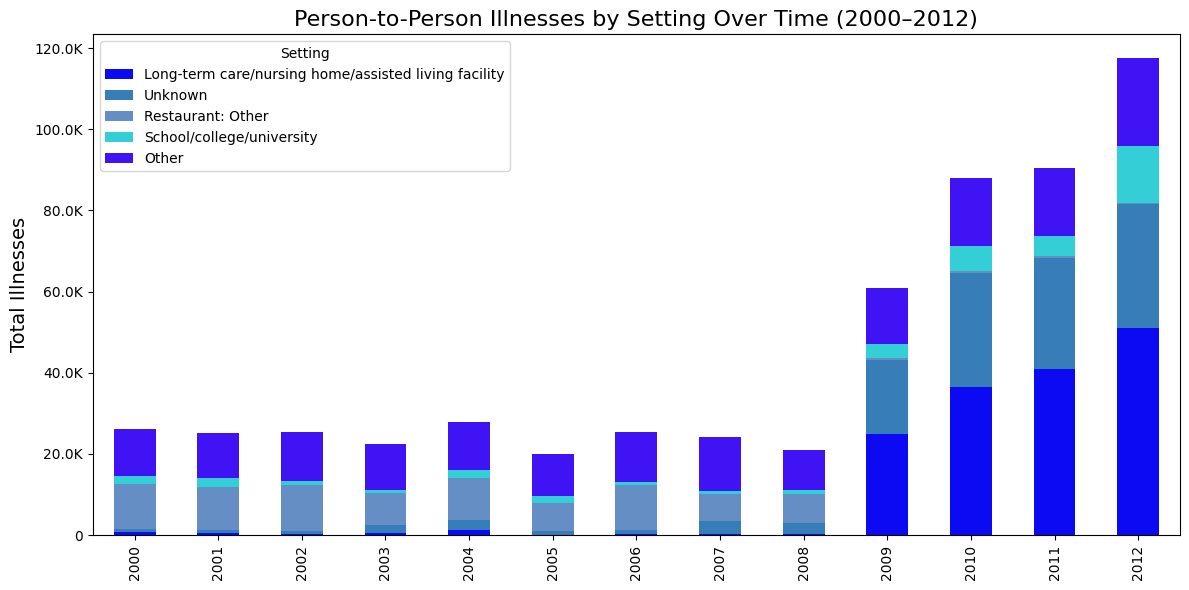

In [19]:
# 6. Setting Impact (2000–2012)
## Question: Which settings accounted for the largest proportion of illnesses?

# Subset and aggregate
year_setting = subset_2012.groupby(['Year','Setting'])['Illnesses'].sum().unstack(fill_value=0)

# Keep only top settings and combine rest as 'Other'
top_settings_list = year_setting.sum().sort_values(ascending=False).head(5).index
year_setting_top = year_setting[top_settings_list]
year_setting_top['Other'] = year_setting.drop(columns=top_settings_list).sum(axis=1)

# Plot 
palette = ["#0C09F3", '#377EB8', "#658ec5","#34CED6", "#3F13F3", "#435F7A"]
ax = year_setting_top.plot(kind='bar', stacked=True, figsize=(12,6), color=palette)
plt.title("Person-to-Person Illnesses by Setting Over Time (2000–2012)", fontsize=16)
plt.ylabel("Total Illnesses", fontsize=14)
plt.xlabel("")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.tight_layout()
plt.grid(False)

# Save figure
plt.savefig("../Figures/person_to_person_illnesses_by_setting.png", dpi=300)

From 2000 to 2012, person-to-person illnesses were most frequently reported in long-term care and nursing home settings. While these facilities accounted for relatively modest case counts in the early 2000s, the number of illnesses increased sharply after 2008, ultimately representing the majority of cases by 2012. Restaurants and settings with unknown classification contributed smaller but steady proportions of illnesses, whereas schools and universities remained minor contributors, with only a brief increase in the mid-2000s.

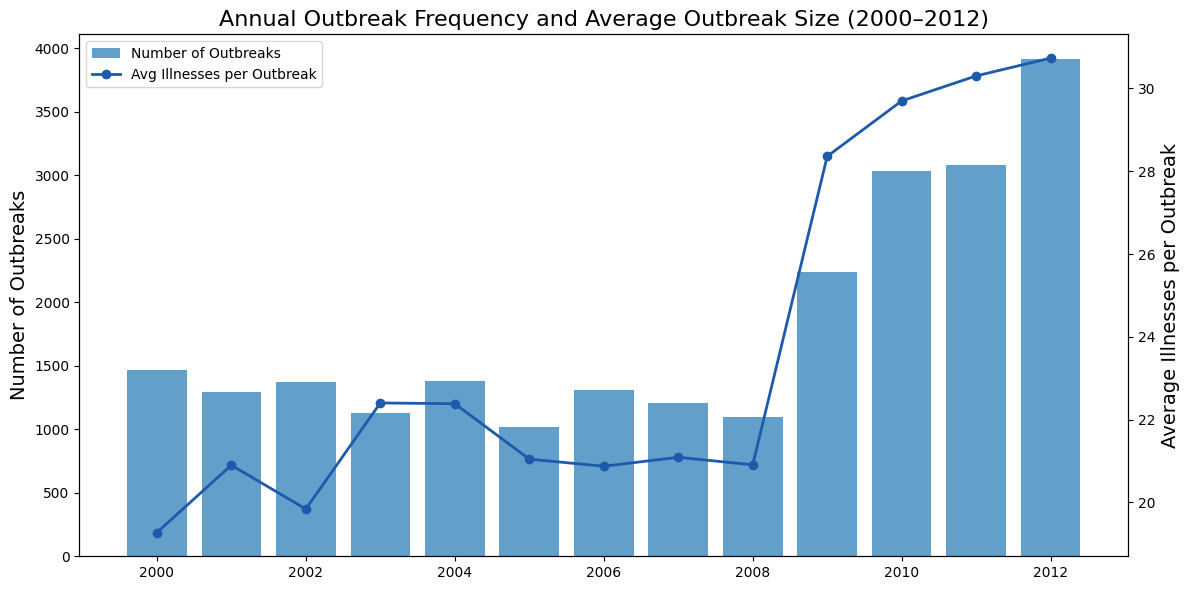

In [24]:
# 7. Outbreak vs Severity (2000–2012)
## Question: Were illness increases caused by more outbreaks or by larger outbreaks?

# Aggregate data by year
yearly = subset_2012.groupby('Year').agg(
    total_outbreaks=('Month', 'count'),  # number of outbreaks
    total_illnesses=('Illnesses', 'sum')  # total illnesses
).reset_index()

# Calculate average illnesses per outbreak
yearly['avg_illnesses_per_outbreak'] = yearly['total_illnesses'] / yearly['total_outbreaks']

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot (number of outbreaks)
ax1.bar(yearly['Year'], yearly['total_outbreaks'], alpha=0.7, label='Number of Outbreaks')
ax1.set_ylabel('Number of Outbreaks', fontsize=14)
ax1.tick_params(axis='y')

# Line plot (average illnesses per outbreak)
ax2 = ax1.twinx()
ax2.plot(yearly['Year'], yearly['avg_illnesses_per_outbreak'], color='#1d5aab', marker='o', linewidth=2, label='Avg Illnesses per Outbreak')
ax2.set_ylabel('Average Illnesses per Outbreak', fontsize=14)
ax2.tick_params(axis='y')

plt.title('Annual Outbreak Frequency and Average Outbreak Size (2000–2012)', fontsize=16)
ax1.grid(False)
ax1.set_xlabel('')

# Legend
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()

# Save figure
plt.savefig("../Figures/outbreaks_vs_severity_2000_2012.png", dpi=300)

Between 2000 and 2012, the post-2008 increase in illnesses was largely driven by a rise in the number of outbreaks rather than a substantial increase in outbreak size. Outbreak counts escalated sharply from just over 1,000 in 2008 to more than 3,800 by 2012, while the average number of illnesses per outbreak grew modestly, from approximately 22 to just over 30.

## 7. Post-EDA Exploration

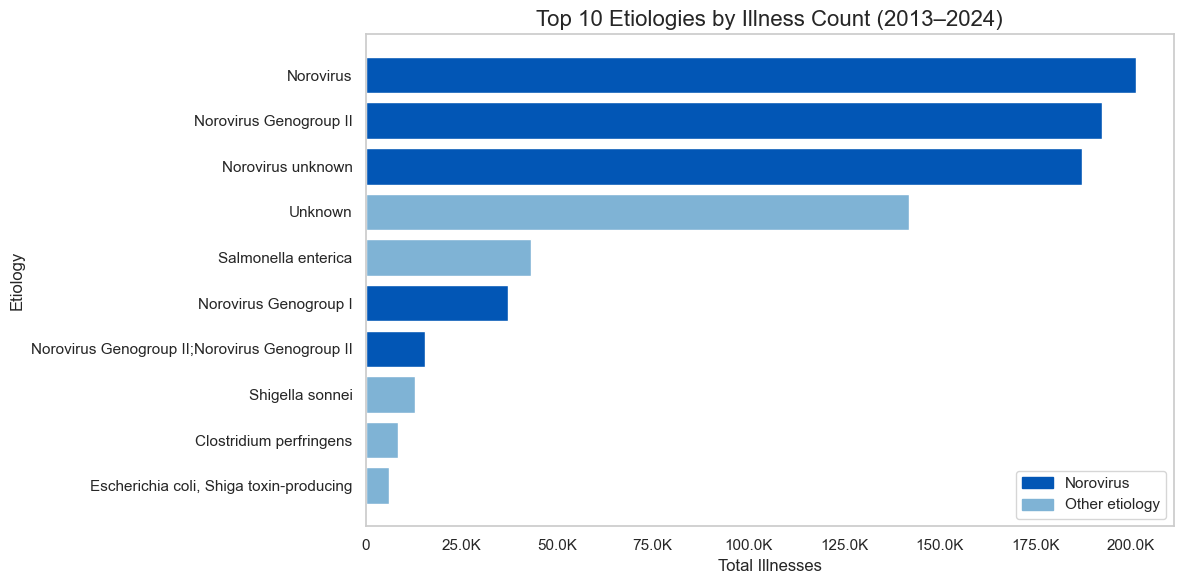

In [ ]:
# What were the top 10 Etiologies between 2013 and 2024?

# Filter data for >2012 
df_2013_24 = df_subset[df_subset["Year"] > 2012]

# Sum illnesses by etiology
etiology_2013_24 = (
    df_2013_24.groupby("Etiology")["Illnesses"]
    .sum()
    .sort_values(ascending=False)
)

# Top 10 etiologies
top_etiology_2013_24 = etiology_2013_24.head(10)

# Plot
colors = [
    "#0256b5" if "noro" in et.lower() else "#7fb3d5"
    for et in top_etiology_2013_24.index
]

plt.figure(figsize=(12,6))
plt.barh(top_etiology_2013_24.index, top_etiology_2013_24.values, color=colors)

plt.title("Top 10 Etiologies by Illness Count (2013–2024)", fontsize=16)
plt.xlabel("Total Illnesses", fontsize=12)
plt.ylabel("Etiology", fontsize=12)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.gca().invert_yaxis()  # largest at top
plt.grid(False)
plt.tight_layout()
plt.show()

# Key 
norovirus_patch = mpatches.Patch(color="#0256b5", label="Norovirus")
other_patch     = mpatches.Patch(color="#7fb3d5", label="Other etiology")
plt.legend(handles=[norovirus_patch, other_patch], loc="lower right")


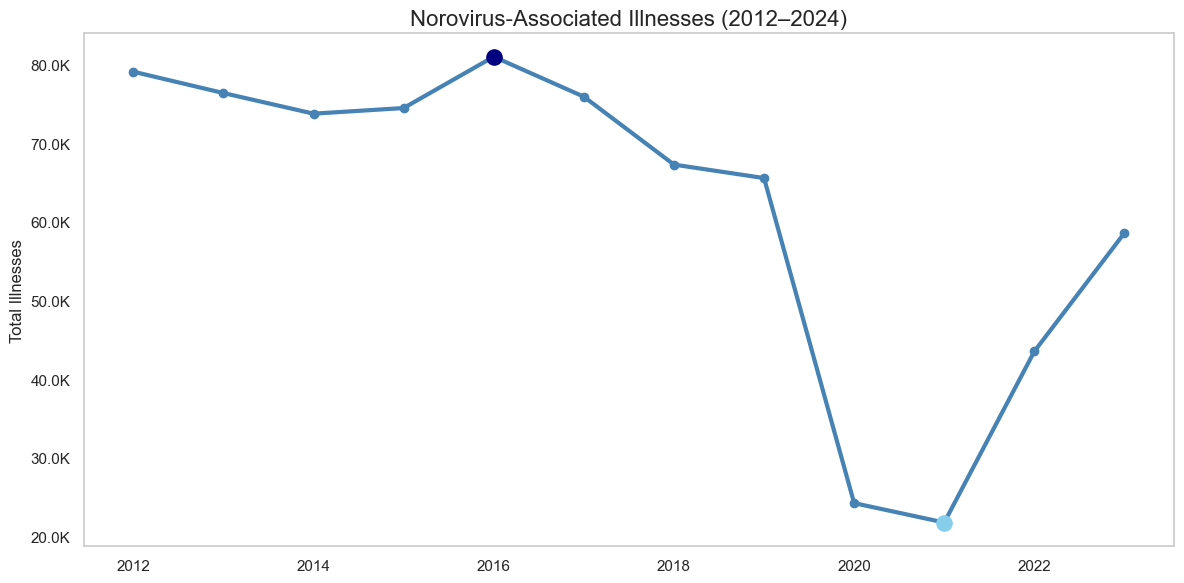

In [ ]:
# How did norovirus illness trends change after the 2012 spike?

# Filter years 2012–2024
df_1224 = df_subset[(df_subset["Year"] >= 2012) & (df_subset["Year"] <= 2024)].copy()

# Keep only norovirus-related outbreaks 
df_1224["Etiology_clean"] = df_1224["Etiology"].str.lower()
df_noro_1224 = df_1224[df_1224["Etiology_clean"].str.contains("noro", na=False)]

# Summarize yearly illnesses
noro_yearly_1224 = (
    df_noro_1224.groupby("Year")["Illnesses"]
    .sum()
    .reset_index()
)

# Identify min/max
max_row = noro_yearly_1224.loc[noro_yearly_1224["Illnesses"].idxmax()]
min_row = noro_yearly_1224.loc[noro_yearly_1224["Illnesses"].idxmin()]

# Plot
plt.figure(figsize=(12,6))
plt.plot(
    noro_yearly_1224["Year"],
    noro_yearly_1224["Illnesses"],
    marker="o",
    linewidth=3,
    color="steelblue"
)

plt.scatter(max_row["Year"], max_row["Illnesses"], s=120, color="navy", zorder=3) # Highlight max 
plt.scatter(min_row["Year"], min_row["Illnesses"], s=120, color="skyblue", zorder=3) # Highlight min 

plt.title("Norovirus-Associated Illnesses (2012–2024)", fontsize=16)
plt.ylabel("Total Illnesses", fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.grid(False)
plt.tight_layout()
plt.show()

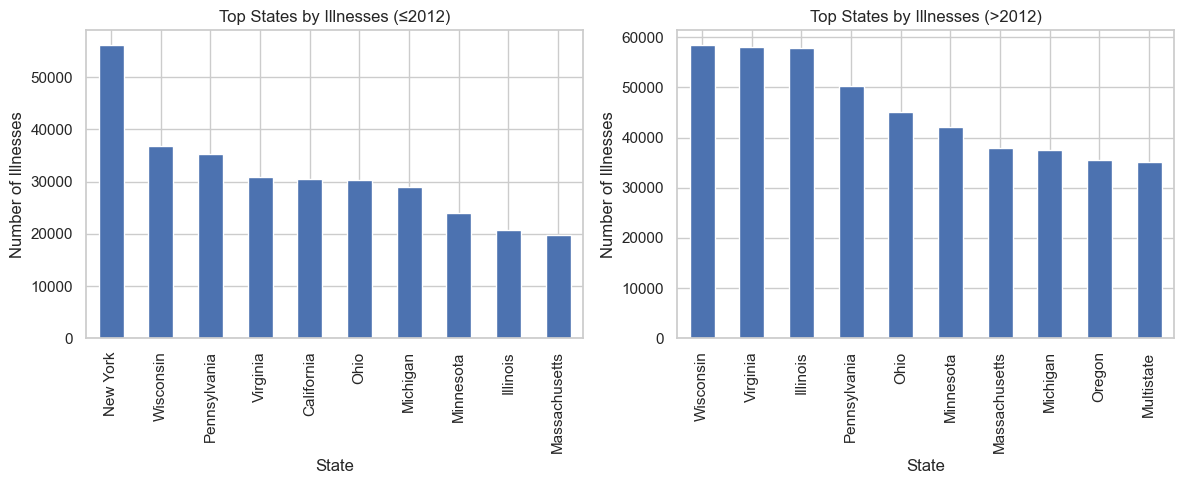

In [ ]:
# Are the top states pre-2012 the same “drivers” post-2012? (Illnesses)

# Top 10 states pre- and post-2012
pre = df_subset[df_subset.Year <= 2012].groupby("State")["Illnesses"].sum().sort_values(ascending=False).head(10)
post = df_subset[df_subset.Year > 2012].groupby("State")["Illnesses"].sum().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(1,2, figsize=(12,5))
pre.plot(kind='bar', ax=ax[0]); ax[0].set_title("Top States by Illnesses (≤2012)")
post.plot(kind='bar', ax=ax[1]); ax[1].set_title("Top States by Illnesses (>2012)")
for a in ax: 
    a.set_ylabel("Number of Illnesses")
plt.tight_layout()
plt.show()

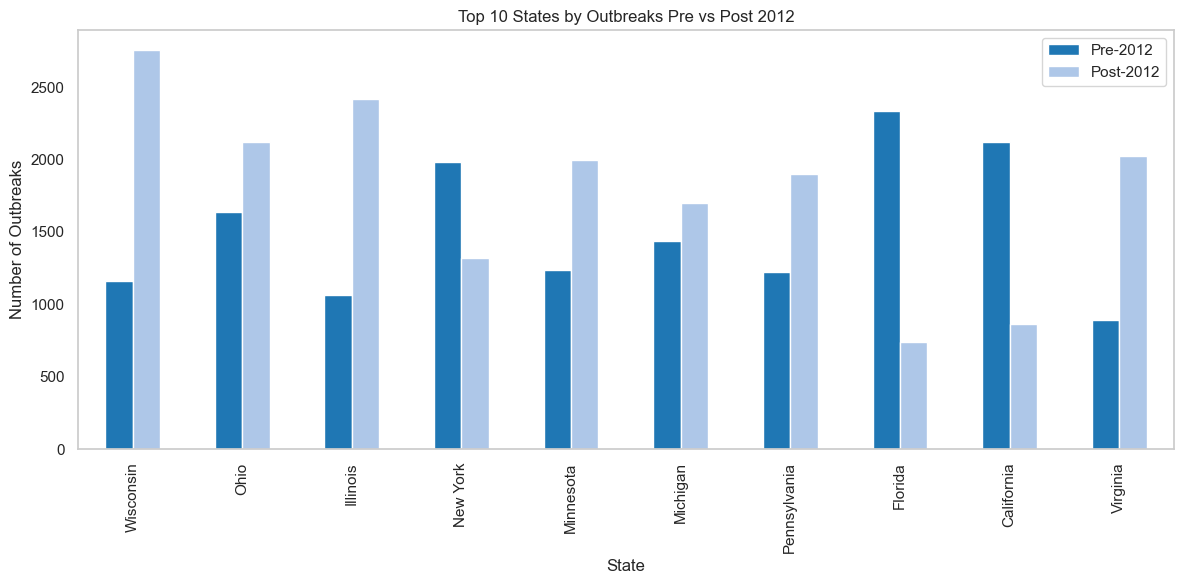

In [ ]:
# Are the top states pre-2012 the same “drivers” post-2012? (outbreaks)

# Pre and post 2012 partitions
pre = df[df["Year"] <= 2012]
post = df[df["Year"] > 2012]

# Outbreak counts 
outbreaks_pre = pre.groupby("State").size().sort_values(ascending=False)
outbreaks_post = post.groupby("State").size().sort_values(ascending=False)

# Side-by-side Comparison
outbreak_compare = pd.concat(
    [outbreaks_pre.rename("Pre-2012"), outbreaks_post.rename("Post-2012")],
    axis=1
).fillna(0)

outbreak_compare.head(10)

# Plot
top_states = outbreak_compare.sum(axis=1).sort_values(ascending=False).head(10).index

outbreak_compare.loc[top_states].plot(
    kind="bar",
    figsize=(12,6),
    color=["#1f77b4", "#aec7e8"]  
)

plt.title("Top 10 States by Outbreaks Pre vs Post 2012")
plt.ylabel("Number of Outbreaks")
plt.tight_layout()
plt.grid(False)
plt.show()


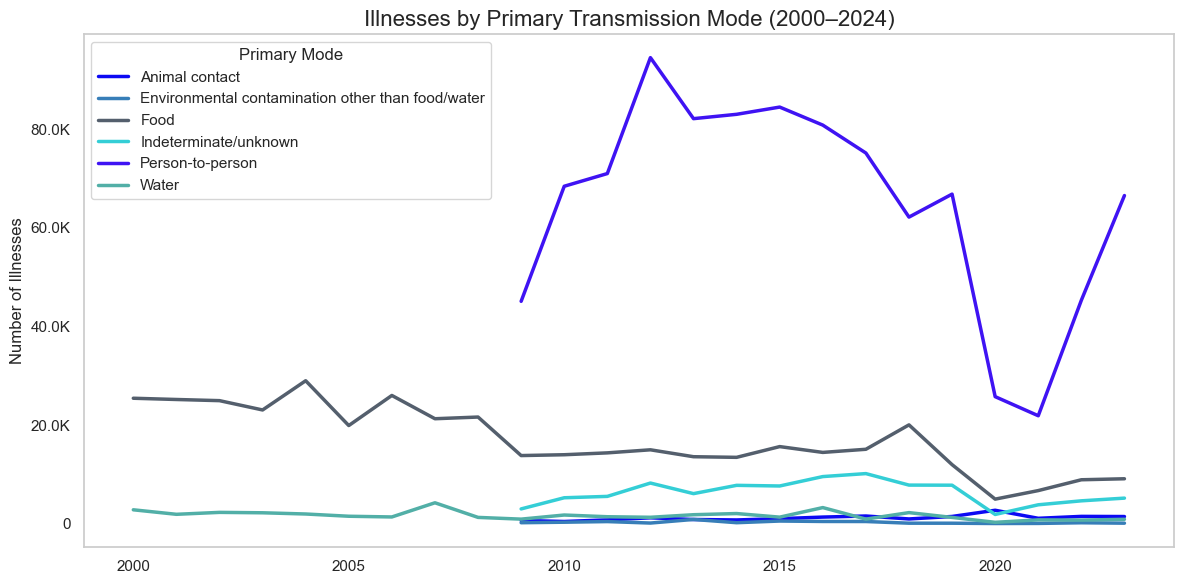

In [ ]:
# How did illness counts differ across primary transmission modes?

# Compute mode counts for the period
mode_year = df_subset.groupby(["Year","Primary Mode"])["Illnesses"].sum().unstack()

# Plot 
plt.figure(figsize=(12,6))
palette = ["#0C09F3", '#377EB8', "#545f6d","#34CED6", "#3F13F3", "#52AFA7"] 
for i, mode in enumerate(mode_year.columns):
    plt.plot(mode_year.index, mode_year[mode], label=mode, color=palette[i % len(palette)], linewidth=2.5)

plt.title("Illnesses by Primary Transmission Mode (2000–2024)", fontsize=16)
plt.ylabel("Number of Illnesses") 
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kmb))
plt.legend(title="Primary Mode")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.grid(False) 
plt.show()

In [ ]:
# Total outbreaks per year (2000–2024)

annual_outbreaks = df_subset.groupby("Year")["Illnesses"].count()
annual_outbreaks

Year
2000    1465
2001    1295
2002    1372
2003    1127
2004    1381
2005    1015
2006    1308
2007    1206
2008    1091
2009    2242
2010    3033
2011    3084
2012    3915
2013    3973
2014    3933
2015    4214
2016    4331
2017    4147
2018    4169
2019    4199
2020    1641
2021    2017
2022    2945
2023    3842
Name: Illnesses, dtype: int64

In [ ]:
# Average illnesses per outbreak by year (2000-2024)

avg_size = df_subset.groupby("Year")["Illnesses"].mean()
avg_size

Year
2000    19.270990
2001    20.898842
2002    19.839650
2003    22.401952
2004    22.399710
2005    21.065025
2006    20.905199
2007    21.141791
2008    20.964253
2009    28.359500
2010    29.707880
2011    30.302529
2012    30.733844
2013    26.502139
2014    27.260615
2015    26.245847
2016    25.363196
2017    24.906197
2018    22.374430
2019    21.285544
2020    21.649604
2021    16.969261
2022    20.765025
2023    21.656689
Name: Illnesses, dtype: float64

In [ ]:
# Compare illnesses by primary transmission mode pre-2012 vs. post-2012

df_period = df_subset.assign(period=np.where(df_subset["Year"]<2012,"<2012",
                         np.where(df_subset["Year"]==2012,"2012",">2012")))
mode_summary = df_period.groupby(["period","Primary Mode"])["Illnesses"].sum()

mode_summary

period  Primary Mode                                     
2012    Animal contact                                         1168.0
        Environmental contamination other than food/water       102.0
        Food                                                  14972.0
        Indeterminate/unknown                                  8223.0
        Person-to-person                                      94585.0
        Water                                                  1273.0
<2012   Animal contact                                         1794.0
        Environmental contamination other than food/water       845.0
        Food                                                 258557.0
        Indeterminate/unknown                                 13724.0
        Person-to-person                                     184638.0
        Water                                                 23372.0
>2012   Animal contact                                        14414.0
        Environmental contaminat